In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!/usr/local/cuda/bin/nvcc --version 

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [3]:
import keras 
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout, Activation, BatchNormalization, Add, AveragePooling2D
from keras.utils.vis_utils import plot_model
import cv2
import os
import numpy as np
from random import shuffle
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [4]:
inputs = keras.Input(shape = (224,224,3), name="input_layer")

x = Conv2D(64, 7, strides = 2, padding= "same")(inputs)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = MaxPool2D(pool_size=(3, 3), strides = 2, padding = "same")(x)
pool_1 = x

x = Conv2D(64, 1, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(64, 3, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(256, 1, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x_1 = Conv2D(256, 1, strides = 1, padding = "same")(pool_1)
x_1 = BatchNormalization()(x_1)
x_1 = Activation("relu")(x_1)

x = Add()([x,x_1])
x = Activation("relu")(x)

join_1 = x

x = Conv2D(64, 1, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(64, 3, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(256, 1, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Add()([x,join_1])
x = Activation("relu")(x)

join_2 = x

x = Conv2D(64, 1, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(64, 3, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(256, 1, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Add()([x,join_2])
x = Activation("relu")(x)

join_3 = x 

x = Conv2D(128, 1, strides = 2, padding = "same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(128, 3, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(512, 1, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)

x_2 = Conv2D(512, 1, strides = 2, padding = "same")(join_3)
x_2 = BatchNormalization()(x_2)
x_2 = Activation("relu")(x_2)

x = Add()([x,x_2])
x = Activation("relu")(x)

join_4 = x 

x = Conv2D(128, 1, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(128, 3, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(512, 1, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)

x = Add()([x,join_4])
x = Activation("relu")(x)

join_5 = x 


x = Conv2D(128, 1, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(128, 3, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(512, 1, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)

x = Add()([x,join_5])
x = Activation("relu")(x)

join_6 = x

x = Conv2D(128, 1, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(128, 3, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(512, 1, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)

x = Add()([x,join_6])
x = Activation("relu")(x)

join_7 = x

x = Conv2D(256, 1, strides = 2, padding = "same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(256, 3, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(1024, 1, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)

x_3 = Conv2D(1024, 1, strides = 2, padding = "same")(join_7)
x_3 = BatchNormalization()(x_3)

x = Add()([x,x_3])
x = Activation("relu")(x)

join_8 = x

x = Conv2D(256, 1, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(256, 3, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(1024, 1, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)

x = Add()([x,join_8])
x = Activation("relu")(x)

join_9 = x

x = Conv2D(256, 1, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(256, 3, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(1024, 1, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)

x = Add()([x,join_9])
x = Activation("relu")(x)

join_10 = x

x = Conv2D(256, 1, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(256, 3, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(1024, 1, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)

x = Add()([x,join_10])
x = Activation("relu")(x)

join_11 = x

x = Conv2D(256, 1, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(256, 3, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(1024, 1, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)

x = Add()([x,join_11])
x = Activation("relu")(x)

join_12 = x

x = Conv2D(256, 1, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(256, 3, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(1024, 1, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)

x = Add()([x,join_12])
x = Activation("relu")(x)

join_13 = x

x = Conv2D(512, 1, strides = 2, padding = "same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(512, 3, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(2048, 1, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)


x_4 = Conv2D(2048, 1, strides = 2, padding = "same")(join_13)
x_4 = BatchNormalization()(x_4) 

x = Add()([x,x_4])
x = Activation("relu")(x)

join_14 = x


x = Conv2D(512, 1, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(512, 3, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(2048, 1, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)

x = Add()([x,join_14])
x = Activation("relu")(x)

join_15 = x

x = Conv2D(512, 1, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(512, 3, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(2048, 1, strides = 1, padding = "same")(x)
x = BatchNormalization()(x)

x = Add()([x,join_15])
x = Activation("relu")(x)

x = AveragePooling2D(pool_size = (7,7), strides = 1, padding = "same")(x)

x = Flatten()(x)
x = Dense(10)(x)
x = Activation("softmax", name="output_layer")(x)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.




In [5]:
model = keras.Model(inputs=inputs , outputs=x)

In [6]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 112, 112, 64) 9472        input_layer[0][0]                
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 112, 112, 64) 256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

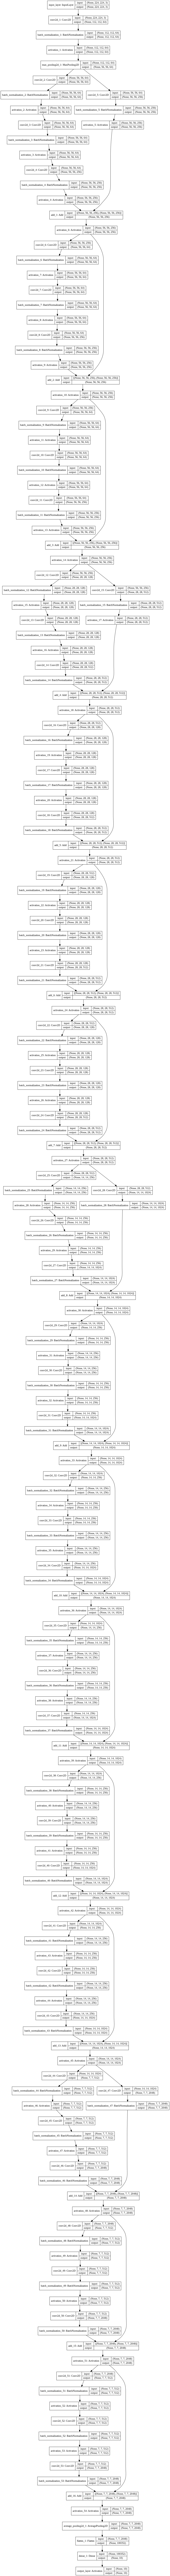

In [7]:
plot_model(model, to_file='/content/gdrive/MyDrive/Dog_Breed_Classifier/model_plot.png', show_shapes=True, show_layer_names=True)

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy',keras.metrics.Precision(), keras.metrics.Recall(), keras.metrics.AUC()])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
model.output_shape

(None, 10)

In [10]:
images_list = []
for root, folder, files in os.walk("/content/gdrive/MyDrive/Dog_Breed_Classifier/New_Train/"):
    for file in files :
        images_list.append(root + file)
shuffle(images_list)
images_list , test = images_list[0:6800] , images_list[6800:]
print("No of Train Images : ", len(images_list))
print("No of Test Images  : ", len(test))

No of Train Images :  6800
No of Test Images  :  769


In [11]:
breeds = {"beagle": 0, "chihuahua": 1, "doberman" : 2,"french_bulldog" : 3, 
          "golden_retriever" : 4, "malamute" : 5, "pug" : 6, "saint_bernard": 7, "scottish_deerhound" : 8,
          "tibetan_mastiff" : 9}

In [12]:
def train_gen(images_list, batch):
    while True:
        total_images = len(images_list)
        for i in range(0, total_images-batch, batch):
            image_batch = []
            label_batch = []
            for image in images_list[i:i+batch]:
                single_image = cv2.imread(image)/255.0 - 0.5
                single_image = cv2.resize(single_image, (224, 224))
                image_batch.append(single_image)
                breed = image.split("/")[-1].split("-")[0]
                label = np.eye(10)[breeds[breed]]
                label_batch.append(label) 
            label_batch = np.array(label_batch) # dtype=np.float32)
            image_batch = np.array(image_batch)
            yield image_batch, label_batch

In [13]:
def test_gen(test, batch) :
    while True:
        test_images = len(test)
        for j in range(0, test_images-batch, batch):
            test_image_batch = []
            test_label_batch = []   
            for test_image in test[j:j+batch]:
                single_test_image = cv2.imread(test_image)/255.0 - 0.5
                single_test_image = cv2.resize(single_test_image, (224, 224))
                test_image_batch.append(single_test_image)
                breed = test_image.split("/")[-1].split("-")[0]
                test_label = np.eye(10)[breeds[breed]]
                test_label_batch.append(test_label) 
            test_label_batch = np.array(test_label_batch) #dtype=np.float32)
            test_image_batch = np.array(test_image_batch)
            yield test_image_batch, test_label_batch

In [16]:
batch_size = 60
model.fit_generator(train_gen(images_list, batch=batch_size), 
                    steps_per_epoch = len(images_list) // batch_size,
                    validation_data = test_gen(test, batch=batch_size), 
                    validation_steps = len(test) // batch_size,
                    epochs=30)

Epoch 1/30
113/113 [==============================] - 89s 786ms/step - loss: 0.8915 - accuracy: 0.6991 - precision_1: 0.8006 - recall_1: 0.5917 - auc_1: 0.9537 - val_loss: 1.4578 - val_accuracy: 0.5125 - val_precision_1: 0.5962 - val_recall_1: 0.4389 - val_auc_1: 0.8817
Epoch 2/30
113/113 [==============================] - 86s 762ms/step - loss: 0.7010 - accuracy: 0.7646 - precision_1: 0.8310 - recall_1: 0.6925 - auc_1: 0.9702 - val_loss: 1.8151 - val_accuracy: 0.4833 - val_precision_1: 0.5400 - val_recall_1: 0.4222 - val_auc_1: 0.8465
Epoch 3/30
113/113 [==============================] - 86s 762ms/step - loss: 0.5267 - accuracy: 0.8212 - precision_1: 0.8667 - recall_1: 0.7777 - auc_1: 0.9827 - val_loss: 1.9073 - val_accuracy: 0.4944 - val_precision_1: 0.5237 - val_recall_1: 0.4611 - val_auc_1: 0.8249
Epoch 4/30
113/113 [==============================] - 86s 761ms/step - loss: 0.4252 - accuracy: 0.8609 - precision_1: 0.8905 - recall_1: 0.8267 - auc_1: 0.9876 - val_loss: 1.2048 - val_ac

In [43]:
y_pred_batch_whole = []
test_label_batch_whole = []
test_images = len(test)
batch = 1
for j in range(0, test_images-batch, batch):
    test_image_batch = []
    test_label_batch = []   
    for test_image in test[j:j+batch]:
        single_test_image = cv2.imread(test_image)/255.0 - 0.5
        single_test_image = cv2.resize(single_test_image, (224, 224))
        breed = test_image.split("/")[-1].split("-")[0]
        test_label = breeds[breed] 
        y_pred = model.predict(np.expand_dims(single_test_image, axis=0), verbose=1)
        y_pred_batch_whole.append(np.argmax(y_pred, axis=1))
        test_label_batch_whole.append(test_label)

1/1 [==============================] - 0s 14ms/step


In [44]:
np.array(test_label_batch_whole).shape

(768,)

In [45]:
print(classification_report(np.reshape(test_label_batch_whole, (768,1)), np.array(y_pred_batch_whole)))

              precision    recall  f1-score   support

           0       0.93      0.58      0.72        93
           1       0.75      0.90      0.82        67
           2       0.87      0.73      0.79        62
           3       0.73      0.75      0.74        63
           4       0.88      0.71      0.79        62
           5       0.76      0.78      0.77        82
           6       0.72      0.95      0.82        95
           7       0.75      0.96      0.84        82
           8       0.89      0.89      0.89        96
           9       0.96      0.77      0.86        66

    accuracy                           0.81       768
   macro avg       0.82      0.80      0.80       768
weighted avg       0.82      0.81      0.80       768



In [50]:
confusion_matrix(np.reshape(test_label_batch_whole, (768,1)), np.array(y_pred_batch_whole))

array([[54,  3,  2,  4,  3,  7,  6, 13,  0,  1],
       [ 0, 60,  0,  0,  2,  1,  2,  1,  1,  0],
       [ 1,  4, 45,  1,  0,  2,  3,  1,  5,  0],
       [ 0,  2,  2, 47,  0,  2,  6,  2,  2,  0],
       [ 0,  4,  0,  6, 44,  3,  2,  1,  1,  1],
       [ 2,  2,  0,  3,  0, 64,  5,  5,  1,  0],
       [ 0,  3,  0,  1,  0,  1, 90,  0,  0,  0],
       [ 1,  0,  1,  0,  0,  0,  1, 79,  0,  0],
       [ 0,  0,  1,  1,  0,  3,  5,  1, 85,  0],
       [ 0,  2,  1,  1,  1,  1,  5,  3,  1, 51]])

In [18]:
model.save("/content/gdrive/MyDrive/Dog_Breed_Classifier/model.h5")